## 『本次練習內容』
#### 使用Xception backbone做 Trnasfer Learning


## 『本次練習目的』
  #### 了解如何使用Transfer Learning
  #### 了解Transfer Learning的優點，可以觀察模型收斂速度

##### 可以自行嘗試多種架構

In [101]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras import backend as K
import keras
from keras.layers import Input
from keras.utils import to_categorical
 
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt


In [102]:
input_tensor = Input(shape=(32, 32, 3))
classes=10
#include top 決定要不要加入 fully Connected Layer
'''Xception 架構'''
base_model = keras.applications.xception.Xception(include_top=False, weights='imagenet', 
                                             input_tensor=input_tensor, input_shape=None, 
                                             pooling=None, classes=classes)

'''Resnet 50 架構'''
# base_model=keras.applications.ResNet50(include_top=False, weights='imagenet',
#                                     input_tensor=input_tensor,
#                                     pooling=None, classes=classes)


'Resnet 50 架構'

## 添加層數

In [103]:
x = base_model.output

'''可以參考Cifar10實作章節'''
x = GlobalMaxPooling2D()(x)
# x = Flatten(name='flatten')(x)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)

predictions = Dense(units=classes,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()
print('Model深度：', len(model.layers))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

## 鎖定特定幾層不要更新權重

In [104]:
for layer in model.layers[:-8]:
    layer.trainable = False
for layer in model.layers[-8:]:
    layer.trainable = True

## 準備 Cifar 10 資料

In [105]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
    
    
## Normalize Training and Testset    
x_train, x_test = normalize(x_train, x_test) 

## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
# one_hot=OneHotEncoder()
# y_train=one_hot.fit_transform(y_train).toarray()
# y_test=one_hot.transform(y_test).toarray()
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)


(50000, 32, 32, 3)


## Training

In [106]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [125]:
history = model.fit(x_train,y_train, validation_split = 0.1, shuffle=True ,batch_size=32,epochs=20)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 58s 1ms/step - loss: 0.9360 - acc: 0.6782 - val_loss: 2.4980 - val_acc: 0.3526
Epoch 2/20
45000/45000 [==============================] - 57s 1ms/step - loss: 0.8056 - acc: 0.7170 - val_loss: 2.5886 - val_acc: 0.3444
Epoch 3/20
45000/45000 [==============================] - 57s 1ms/step - loss: 0.7601 - acc: 0.7332 - val_loss: 2.6763 - val_acc: 0.3772
Epoch 4/20
45000/45000 [==============================] - 57s 1ms/step - loss: 0.7241 - acc: 0.7446 - val_loss: 2.9507 - val_acc: 0.3382
Epoch 5/20
45000/45000 [==============================] - 57s 1ms/step - loss: 0.7006 - acc: 0.7544 - val_loss: 2.6705 - val_acc: 0.3678
Epoch 6/20
45000/45000 [==============================] - 59s 1ms/step - loss: 0.6813 - acc: 0.7618 - val_loss: 2.8412 - val_acc: 0.3640
Epoch 7/20
45000/45000 [==============================] - 57s 1ms/step - loss: 0.6616 - acc: 0.7657 - val_loss: 2.6080 - val_acc:

## Visualize

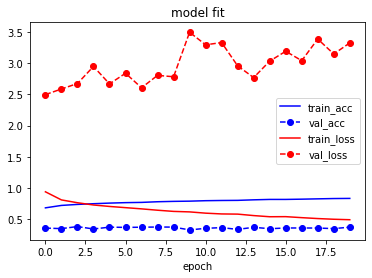

In [129]:
plt.plot(history.history['acc'],"b")
plt.plot(history.history['val_acc'], "bo--")
plt.plot(history.history['loss'], "r")
plt.plot(history.history['val_loss'], "ro--")
plt.title('model fit')
# plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc', 'train_loss', 'val_loss'], loc='right')
plt.show()

In [127]:
score = model.evaluate(x_test, y_test, batch_size=64)
print('test loss, test acc:', score)

10000/10000 [==============================] - 7s 697us/step
test loss, test acc: [3.398505485534668, 0.3643]
